# Cluster in Python
在此我們要示範如何使用Python進行分群法的實作


## Data Preparing

跟Weka不同的是，鳶尾花資料集已經存在於Weka的預設資料集當中

而使用Python自行操作的時候，則需要自己下載鳶尾花資料集


In [1]:
import pandas as pd
from sklearn import datasets, cluster, metrics, preprocessing

In [2]:
import pandas as pd

# fetch dataset
# iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
row_data=pd.read_csv('winequality-red.csv')
row_data=pd.DataFrame(row_data)
X = row_data.iloc[:, :11+1]
y= row_data[['quality category']]


In [3]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
le = preprocessing.LabelEncoder()
class_ls = le.fit_transform(y['quality category'])

new_y = pd.DataFrame(class_ls, columns = ['quality category'])
new_y

,quality category
0,0
1,0
2,0
3,0
4,0
...,...
1594,0
1595,0
1596,0
1597,0


## Model Training

資料準備完成後，進行k-means分群

In [5]:
km = cluster.KMeans(n_clusters=3, init='k-means++')
km.fit(X)

c:\Users\n9613\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=3)

In [6]:
km.labels_

array([0, 1, 1, ..., 1, 1, 1])

In [7]:
new_y['quality category'].to_numpy()

array([0, 0, 0, ..., 0, 0, 0])

## Visualization
將分群結果以視覺化方式呈現

In [8]:
# import 繪圖model
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
np_wine_X = X.to_numpy()
np_wine_X

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [10]:
import numpy as np

In [11]:
# np_wine_X[:, 1]
# np.mean(np_wine_X[:, 1])
# np.std(np_wine_X[:, 1])
x1=np_wine_X[:, 1]-np.mean(np_wine_X[:, 1])/np.std(np_wine_X[:, 1])
x1

y9=np_wine_X[:, 9]-np.mean(np_wine_X[:, 9])/np.std(np_wine_X[:, 9])
y9

array([-3.32393883, -3.20393883, -3.23393883, ..., -3.13393883,
       -3.17393883, -3.22393883])

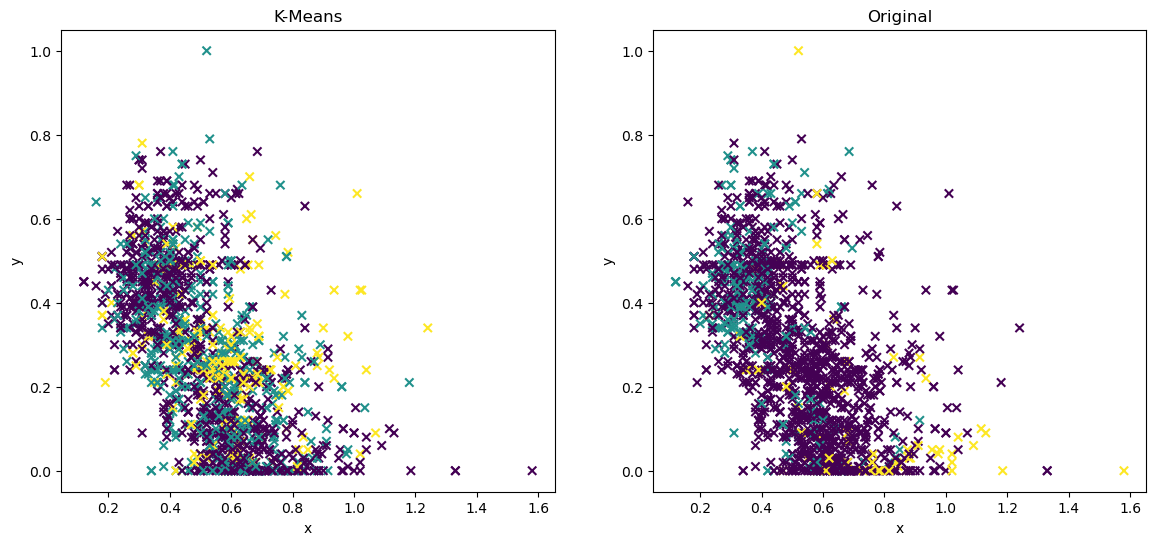

In [25]:
# plt.subplots(橫列數量, 直行數量)
# sharey=True 共享y軸
f, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].set_title('K-Means')
# 選擇petal length/petal width兩個維度來畫點狀分布圖
axes[0].scatter(np_wine_X[:, 1], np_wine_X[:, 2], c=km.labels_, cmap='viridis',marker='x')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

axes[1].set_title('Original')
axes[1].scatter(np_wine_X[:, 1], np_wine_X[:, 2], c=new_y['quality category'].to_numpy(), cmap='viridis',marker='x')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')

plt.savefig('kmeans-1.9.10.png')

## Evaluation
評估模型分群成效

In [13]:
# 此數值越接近1，表示群內差異小、且不同分群之間的差異大 => 好的分群
# 此數值越接近0，表示群內差異大、且不同分群之間的差異小 => 壞的分群
metrics.silhouette_score(X, km.labels_)

0.5206311819419417

In [14]:
def get_kscore(k):
  km = cluster.KMeans(n_clusters=k)
  km.fit(X)
  return metrics.silhouette_score(X, km.labels_)

c:\Users\n9613\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\n9613\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\n9613\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\n9613\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'kscore')

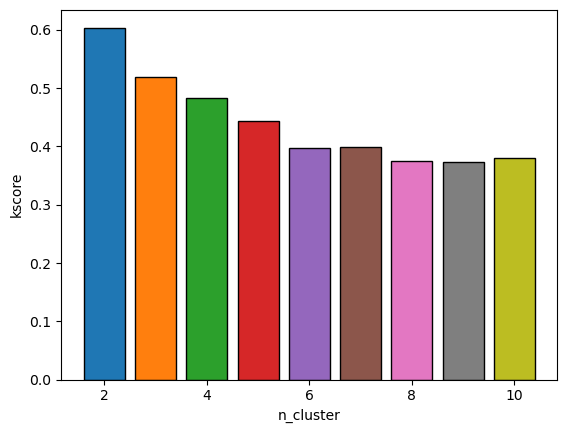

In [15]:
# 迭代找到最佳的分群數量
for k in range(2, 11):
  plt.bar(k, get_kscore(k),edgecolor="black")

plt.xlabel('n_cluster')
plt.ylabel('kscore')